<a href="https://colab.research.google.com/github/jcjimenezb123/ProgramacionPython/blob/master/Interpolacion01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Interpolación Lineal

La medición de la densidad del carbonato de potasio a distintas concentraciones a temperatura constante genera los siguientes datos.

$$
\begin{array}{l|c|c|c|c|c|c}
\text{Concentración}&4.1& 12.2& 20.3& 28.2& 38.1& 45.2\\
\hline
\text{Densidad}&1.0276& 1.1013& 1.1801& 1.2652& 1.3480& 1.4120
\end{array}
$$

Obtener la densidad del Carbonato de Potasio a una concentración de 15%.

In [ ]:
import numpy as np
from scipy import interpolate

In [ ]:
x=np.array([4.1,12.2,20.3,28.2,38.1,45.2])
y=np.array([1.0276,1.1013,1.1801,1.2652,1.3480,1.4120])

In [ ]:
xi=15
p=interpolate.interp1d(x,y)
yi=p(xi)
print(yi)

1.1285395061728394


In [ ]:
import plotly.express as px
import plotly.graph_objs as go

xs=np.linspace(x.min(),x.max())
ys=p(xs)

traza1=go.Scatter(x=x,y=y,mode='markers',name='datos',
                  line=dict(color='salmon',dash='dashdot'))
traza2=go.Scatter(x=xs,y=ys,mode='lines',name='regresion',
                  line=dict(color='royalblue',dash='dot'))

data=[traza1,traza2]

layout=go.Layout(title='Interpolacion Lineal',
                 xaxis=dict(title='x'),
                 yaxis=dict(title='y'))
fig=go.Figure(data=data,layout=layout)
fig.show()

##Interpolación de Lagrange

En temporada de lluvias se toma la profundidad del agua en una presa, obteniendo los siguientes datos:

$$
\begin{array}{l|c|c|c|c|c|c}
\text{Dia}&1& 4& 8& 13& 18\\
\hline
\text{Profundidad}&1.1& 1.5& 12.8& 15.3& 15.5
\end{array}
$$

Calcular la profundidad del agua en el día 3.

In [ ]:
import numpy as np
from scipy.interpolate import lagrange

In [ ]:
x=np.array([1,4,8,13,18])
y=np.array([1.1,1.5,12.8,15.3,15.5])

In [ ]:
p=lagrange(x,y)
xi=3
yi=p(xi)
print(yi)

-0.3424369747899192


In [ ]:
print(p)

          4          3         2
0.004043 x - 0.1587 x + 1.942 x - 6.589 x + 5.901


In [ ]:
xs=np.linspace(x.min(),x.max())
ys=p(xs)

traza1=go.Scatter(x=x,y=y,mode='markers',name='datos',
                  line=dict(color='salmon',dash='dashdot'))
traza2=go.Scatter(x=xs,y=ys,mode='lines',name='regresion',
                  line=dict(color='royalblue',dash='dot'))

data=[traza1,traza2]

layout=go.Layout(title='Interpolacion Lagrange',
                 xaxis=dict(title='x'),
                 yaxis=dict(title='y'))
fig=go.Figure(data=data,layout=layout)
fig.show()

##Interpolación Spline cúbico

Usar la interpolación de Spline Cúbico en el problema de Runge.

Usemos la función
$$
f(x)=\frac{1}{1+25x^2}
$$

en el intervalo $x\in[-1,1]$

In [ ]:
import numpy as np
from scipy import interpolate

In [ ]:
x=np.linspace(-1,1,10)
y=1/(1+25*x**2)

In [ ]:
metodos=['linear','quadratic','cubic','nearest']
colores=['royalblue','orange','green','magenta']
datos=[go.Scatter(x=x,y=y,mode='markers',name='Datos',
                  line=dict(color='black',dash='dot'))]
for m,c in zip(metodos,colores):
  s=interpolate.interp1d(x,y,kind=m)
  xs=np.linspace(x.min(),x.max())
  ys=s(xs)
  traza=go.Scatter(x=xs,y=ys,mode='lines',name=m,
                  line=dict(color=c,dash='dot'))
  datos.append(traza)

In [ ]:
layout=go.Layout(title='Problema de Runge',
                 xaxis=dict(title='x'),
                 yaxis=dict(title='y'))
fig=go.Figure(data=datos,layout=layout)
fig.show()

##Interpolación en 2 dimensiones

La siguiente información muestra la Entalpía de vapor supercalentado a distintas temperaturas y presiones, use la interpolación en dos dimensiones para estimar la Entalpía a 420K y 190Kpa

$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Presión\Temperatura}&300 &350 &400 &450 &500\\
\hline
150 &3073.3 &3174.7 &3277.5 &3381.7 &3487.6\\
200 &3072.1 &3173.8 &3276.7 &3381.1 &3487.0\\
250 &3070.9 &3172.8 &3275.9 &3380.4 &3486.5\\
300 &3069.7 &3171.9 &3275.2 &3379.8 &3486.0\\
\hline
\end{array}
$$



In [1]:
import numpy as np
from scipy import interpolate

In [14]:
x=np.array ([300 ,350 ,400 ,450 ,500])
y=np.array ([150 ,200 ,250 ,300])
z=np.array ([[3073.3 ,3174.7 ,3277.5 ,3381.7 ,3487.6] ,\
              [3072.1 ,3173.8 ,3276.7 ,3381.1 ,3487.0] ,\
              [3070.9 ,3172.8 ,3275.9 ,3380.4 ,3486.5] ,\
              [3069.7 ,3171.9 ,3275.2 ,3379.8 ,3486.0]])

In [16]:
f=interpolate.interp2d(x,y,z,kind='cubic')
xi,yi=420,190
zi=f(xi,yi)
print(zi)

[3318.426752]


In [19]:
import plotly.graph_objects as go

X, Y = np.meshgrid(x, y)

fig = go.Figure(data=[go.Scatter3d(x=X,y=Y,z=z,
                                   mode='markers',name='datos'),
                      go.Surface(z=z,x=X,y=Y,name='interpolacion')])
fig.update_layout(scene = dict(
                    xaxis_title='Temperatura',
                    yaxis_title='Presion',
                    zaxis_title='Entalpia'))
fig.show()

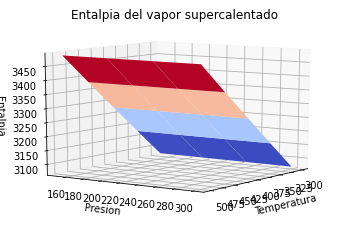

In [ ]:
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_surface(X, Y, z,cmap =cm.coolwarm)
ax.view_init(10,35)
ax.set_xlabel('Temperatura')
ax.set_ylabel('Presion')
ax.set_zlabel('Entalpia')
ax.set_title('Entalpia del vapor')
plt.show()